In [137]:
import pandas as pd

df = pd.read_csv("../data/raw/sales_train.csv")

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [139]:
total_cnt_day = df['item_cnt_day'].sum()
print(total_cnt_day)

3648206.0


In [140]:
block_cnt = df['item_cnt_day'].groupby(df['date_block_num']).sum()

In [141]:
total_cnt = block_cnt.sum()

In [142]:
sold = df[df['item_cnt_day'] >= 0]
return_goods = df[df['item_cnt_day'] < 0]

In [143]:
print(sold['item_cnt_day'].sum())
print(return_goods['item_cnt_day'].sum())

3655747.0
-7541.0


In [144]:
unique_date_per_block_num = df['date'].groupby(df['date_block_num']).nunique()
print(unique_date_per_block_num)

date_block_num
0     31
1     28
2     31
3     30
4     31
5     30
6     31
7     31
8     30
9     31
10    30
11    31
12    31
13    28
14    31
15    30
16    31
17    30
18    31
19    31
20    30
21    31
22    30
23    31
24    31
25    28
26    31
27    30
28    31
29    30
30    31
31    31
32    30
33    31
Name: date, dtype: int64


ta thấy block nào cũng đủ date trong tháng -> có thể tính tổng days = nunique cột date

In [145]:
total_days_of_selling = unique_date_per_block_num.sum()

print(total_days_of_selling)

1034


In [146]:
non_zero_demand_days = df['date'].groupby(sold['item_id']).nunique()

zero_demand_days = total_days_of_selling - non_zero_demand_days

zero_ratio = zero_demand_days / total_days_of_selling

print(non_zero_demand_days)
print(zero_demand_days)
print(zero_ratio)

item_id
0.0          1
1.0          6
2.0          2
3.0          2
4.0          1
          ... 
22165.0      2
22166.0    270
22167.0    570
22168.0      6
22169.0      1
Name: date, Length: 21804, dtype: int64
item_id
0.0        1033
1.0        1028
2.0        1032
3.0        1032
4.0        1033
           ... 
22165.0    1032
22166.0     764
22167.0     464
22168.0    1028
22169.0    1033
Name: date, Length: 21804, dtype: int64
item_id
0.0        0.999033
1.0        0.994197
2.0        0.998066
3.0        0.998066
4.0        0.999033
             ...   
22165.0    0.998066
22166.0    0.738878
22167.0    0.448743
22168.0    0.994197
22169.0    0.999033
Name: date, Length: 21804, dtype: float64


đếm tổng string khác nhau của 1 loại item => số ngày mà sản phẩm đó được bán

In [147]:
print(non_zero_demand_days.describe())

count    21804.000000
mean        70.559989
std        109.182634
min          1.000000
25%          6.000000
50%         29.000000
75%         86.000000
max       1033.000000
Name: date, dtype: float64


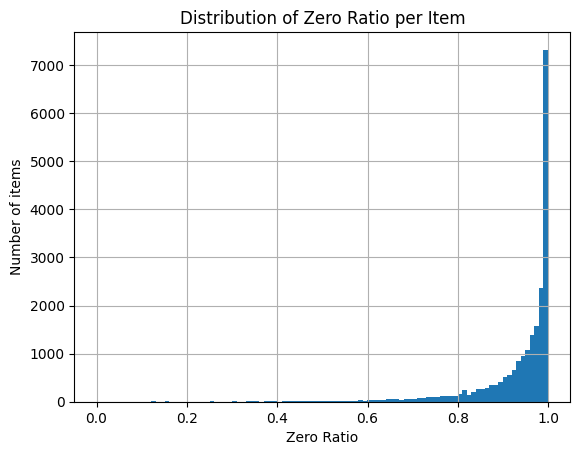

count    21804.000000
mean         0.931760
std          0.105592
min          0.000967
25%          0.916828
50%          0.971954
75%          0.994197
max          0.999033
Name: date, dtype: float64


In [148]:
zero_ratio.hist(bins=100)
plt.xlabel('Zero Ratio')
plt.ylabel('Number of items')
plt.title('Distribution of Zero Ratio per Item')
plt.show()
print(zero_ratio.describe())

In [149]:
day_sell_of_item = df['date'].groupby(sold['item_id']).unique()

In [150]:
items_df = pd.concat([zero_ratio, day_sell_of_item], axis=1)
items_df.columns = ['zero_ratio', 'days_sold']
print(items_df)

         zero_ratio                                          days_sold
item_id                                                               
0.0        0.999033                                       [01.09.2014]
1.0        0.994197  [04.04.2014, 02.04.2014, 06.07.2014, 04.08.201...
2.0        0.998066                           [24.08.2014, 12.11.2014]
3.0        0.998066                           [05.07.2014, 26.08.2014]
4.0        0.999033                                       [19.09.2014]
...             ...                                                ...
22165.0    0.998066                           [26.08.2013, 18.05.2014]
22166.0    0.738878  [31.10.2013, 30.10.2013, 27.10.2013, 26.10.201...
22167.0    0.448743  [29.09.2013, 28.09.2013, 30.09.2013, 27.09.201...
22168.0    0.994197  [20.01.2013, 15.01.2013, 02.02.2013, 17.02.201...
22169.0    0.999033                                       [21.03.2014]

[21804 rows x 2 columns]


In [151]:
from src.utils.date_caculator import compute_interarrival
items_df['interarrival'] = items_df['days_sold'].map(compute_interarrival)


In [152]:
items_df['var_demand_days'] = sold['item_cnt_day'].groupby(sold['item_id']).var()
items_df['mean_demand_days'] = sold['item_cnt_day'].groupby(sold['item_id']).mean()
items_df['cv2'] = items_df['var_demand_days'] / (items_df['mean_demand_days'] ** 2)


In [153]:
items_df['ADI'] = items_df['interarrival'].apply(np.mean)

print(items_df)

         zero_ratio                                          days_sold  \
item_id                                                                  
0.0        0.999033                                       [01.09.2014]   
1.0        0.994197  [04.04.2014, 02.04.2014, 06.07.2014, 04.08.201...   
2.0        0.998066                           [24.08.2014, 12.11.2014]   
3.0        0.998066                           [05.07.2014, 26.08.2014]   
4.0        0.999033                                       [19.09.2014]   
...             ...                                                ...   
22165.0    0.998066                           [26.08.2013, 18.05.2014]   
22166.0    0.738878  [31.10.2013, 30.10.2013, 27.10.2013, 26.10.201...   
22167.0    0.448743  [29.09.2013, 28.09.2013, 30.09.2013, 27.09.201...   
22168.0    0.994197  [20.01.2013, 15.01.2013, 02.02.2013, 17.02.201...   
22169.0    0.999033                                       [21.03.2014]   

                                     

/Users/cps/Library/Caches/pypoetry/virtualenvs/data-science-ecommerce-cOQ0u3NZ-py3.11/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/cps/Library/Caches/pypoetry/virtualenvs/data-science-ecommerce-cOQ0u3NZ-py3.11/lib/python3.11/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [232]:
q3_adi = items_df["ADI"].quantile(0)
q3_zero_ratio = items_df["zero_ratio"].quantile(0)
q3_cv2  = items_df['cv2'].quantile(0.97)


filter_items = items_df[items_df["ADI"] > q3_adi]
filter_items = filter_items[filter_items["zero_ratio"] > q3_zero_ratio]
filter_items = filter_items[filter_items["zero_ratio"] > q3_cv2]


print(filter_items.describe())

         zero_ratio  var_demand_days  mean_demand_days           cv2  \
count  17689.000000     17689.000000      17689.000000  17689.000000   
mean       0.948800         4.172790          1.089566      0.095751   
std        0.053121       171.908891          0.976058      0.619241   
min        0.773694         0.000000          1.000000      0.000000   
25%        0.924565         0.000000          1.000000      0.000000   
50%        0.969052         0.000000          1.000000      0.000000   
75%        0.990329         0.035714          1.034483      0.033294   
max        0.998066     12636.329545         65.473684     44.692752   

                ADI  
count  17689.000000  
mean      29.178893  
std       59.666263  
min        1.016949  
25%        5.175325  
50%       11.139535  
75%       27.424242  
max      978.000000  


In [155]:
items_df.to_csv("../data/processed/items_zero_ratio_days_sold.csv", index=True)

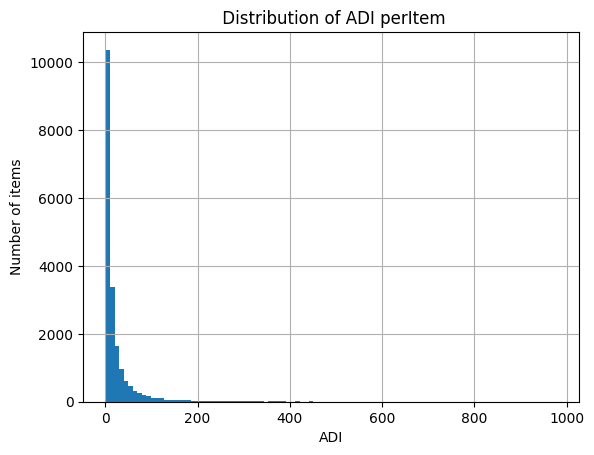

In [205]:
items_df['ADI'].hist(bins=100)
plt.xlabel('ADI')
plt.ylabel('Number of items')
plt.title(' Distribution of ADI perItem')
plt.show()


In [206]:

df_visual = filter_items[["ADI", "cv2", "zero_ratio"]].dropna().copy()

In [212]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = df_visual[['ADI', 'cv2', 'zero_ratio']].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_visual['demand_cluster'] = kmeans.fit_predict(X_scaled)

print(df_visual['demand_cluster'])

item_id
102.0      0
103.0      2
104.0      2
107.0      0
108.0      0
          ..
22011.0    0
22036.0    2
22090.0    2
22125.0    0
22165.0    0
Name: demand_cluster, Length: 971, dtype: int32


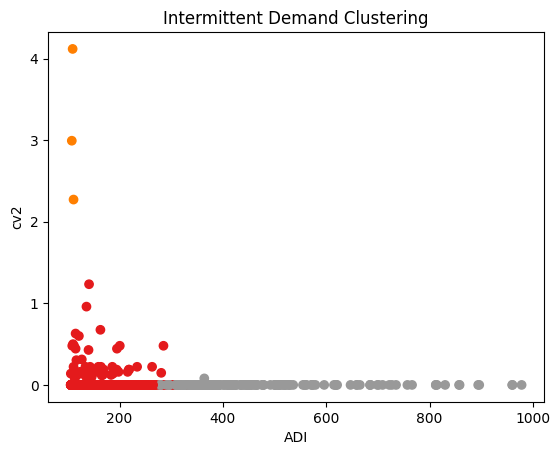

In [213]:
import matplotlib.pyplot as plt

plt.scatter(df_visual['ADI'], df_visual['cv2'], c=df_visual['demand_cluster'], cmap='Set1')
plt.xlabel("ADI")
plt.ylabel("cv2")
plt.title("Intermittent Demand Clustering")
plt.show()

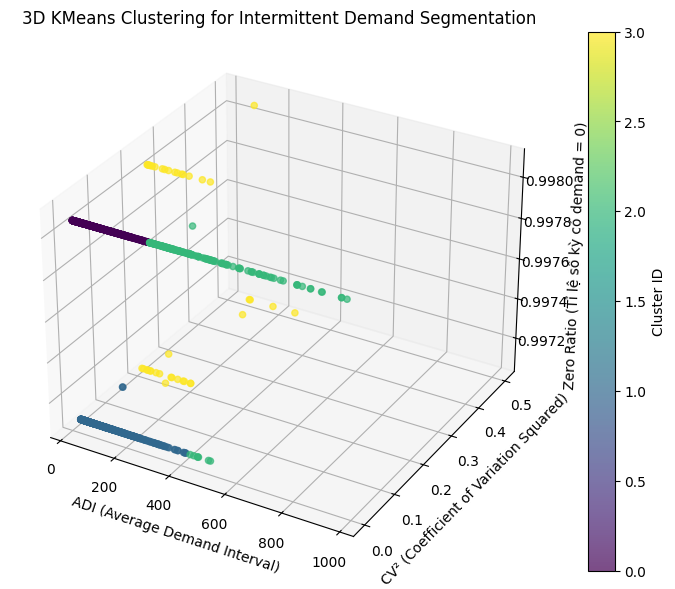

In [172]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df_visual["ADI"],
    df_visual["cv2"],
    df_visual["zero_ratio"],
    c=df_visual["kmeans_cluster"],
    cmap="viridis",
    alpha=0.7
)

ax.set_xlabel("ADI (Average Demand Interval)")
ax.set_ylabel("CV² (Coefficient of Variation Squared)")
ax.set_zlabel("Zero Ratio (Tỉ lệ số kỳ có demand = 0)")
ax.set_title("3D KMeans Clustering for Intermittent Demand Segmentation")

fig.colorbar(sc, ax=ax, label="Cluster ID")
plt.show()